# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []
reviews_rating = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [4]:
df = pd.DataFrame()
for review in reviews:
    x =  review.split("|", 1)
    reviews[reviews.index(review)] = x[-1]
df["reviews"] = reviews
df.head()

,reviews
0,Flight fine. In-line with competitors. Pleas...
1,Came from Glasgow to London and took connect...
2,My flight on on 12 May 2023 got delayed an h...
3,Cairo is a 5 hour flight and BA considers it...
4,After travelling London to Madrid with Briti...


In [5]:
df.to_csv("/Users/chouchou/Desktop/DA/data/BA_review.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you 
want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
import string
PUNCT_TO_REMOVE = string.punctuation
for review in reviews:
    reviews[reviews.index(review)] = review.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
df["cleaned-reviews"] = reviews
df["cleaned-reviews"] = df["cleaned-reviews"].str.lower()
df.head()

,reviews,cleaned-reviews
0,Flight fine. In-line with competitors. Pleas...,flight fine inline with competitors pleasant...
1,Came from Glasgow to London and took connect...,came from glasgow to london and took connect...
2,My flight on on 12 May 2023 got delayed an h...,my flight on on 12 may 2023 got delayed an h...
3,Cairo is a 5 hour flight and BA considers it...,cairo is a 5 hour flight and ba considers it...
4,After travelling London to Madrid with Briti...,after travelling london to madrid with briti...


In [7]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords


tokenizer = word_tokenize
stop_words = set(stopwords.words('english'))

df["tokenize"] = df["cleaned-reviews"].apply(tokenizer)
df['tokenize'] = df['tokenize'].apply(lambda x: ' '.join([word for word in x if word not in stop_words]))

df

,reviews,cleaned-reviews,tokenize
0,Flight fine. In-line with competitors. Pleas...,flight fine inline with competitors pleasant...,flight fine inline competitors pleasant crew n...
1,Came from Glasgow to London and took connect...,came from glasgow to london and took connect...,came glasgow london took connecting flight ame...
2,My flight on on 12 May 2023 got delayed an h...,my flight on on 12 may 2023 got delayed an h...,flight 12 may 2023 got delayed hour 25 minutes...
3,Cairo is a 5 hour flight and BA considers it...,cairo is a 5 hour flight and ba considers it...,cairo 5 hour flight ba considers short haul ev...
4,After travelling London to Madrid with Briti...,after travelling london to madrid with briti...,travelling london madrid british airways iberi...
...,...,...,...
3585,LHR-JFK-LAX-LHR. Check in was ok apart from be...,lhrjfklaxlhr check in was ok apart from being ...,lhrjfklaxlhr check ok apart snapped early chec...
3586,LHR to HAM. Purser addresses all club passenge...,lhr to ham purser addresses all club passenger...,lhr ham purser addresses club passengers name ...
3587,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,son worked british airways urged fly british a...
3588,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon on a318 bu...,london citynew york jfk via shannon a318 reall...


In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['polarity']  = df['tokenize'].apply(lambda x: sia.polarity_scores(x)['compound'])
df


,reviews,cleaned-reviews,tokenize,polarity
0,Flight fine. In-line with competitors. Pleas...,flight fine inline with competitors pleasant...,flight fine inline competitors pleasant crew n...,0.7650
1,Came from Glasgow to London and took connect...,came from glasgow to london and took connect...,came glasgow london took connecting flight ame...,0.2584
2,My flight on on 12 May 2023 got delayed an h...,my flight on on 12 may 2023 got delayed an h...,flight 12 may 2023 got delayed hour 25 minutes...,-0.9211
3,Cairo is a 5 hour flight and BA considers it...,cairo is a 5 hour flight and ba considers it...,cairo 5 hour flight ba considers short haul ev...,-0.8192
4,After travelling London to Madrid with Briti...,after travelling london to madrid with briti...,travelling london madrid british airways iberi...,-0.8779
...,...,...,...,...
3585,LHR-JFK-LAX-LHR. Check in was ok apart from be...,lhrjfklaxlhr check in was ok apart from being ...,lhrjfklaxlhr check ok apart snapped early chec...,0.6369
3586,LHR to HAM. Purser addresses all club passenge...,lhr to ham purser addresses all club passenger...,lhr ham purser addresses club passengers name ...,0.7650
3587,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,son worked british airways urged fly british a...,0.7003
3588,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon on a318 bu...,london citynew york jfk via shannon a318 reall...,0.8070


In [9]:
df['sentiment'] = df["polarity"].apply(lambda x: 'positive' if x >=0 else 'negative' if x < 0 else 'neu')
df

,reviews,cleaned-reviews,tokenize,polarity,sentiment
0,Flight fine. In-line with competitors. Pleas...,flight fine inline with competitors pleasant...,flight fine inline competitors pleasant crew n...,0.7650,positive
1,Came from Glasgow to London and took connect...,came from glasgow to london and took connect...,came glasgow london took connecting flight ame...,0.2584,positive
2,My flight on on 12 May 2023 got delayed an h...,my flight on on 12 may 2023 got delayed an h...,flight 12 may 2023 got delayed hour 25 minutes...,-0.9211,negative
3,Cairo is a 5 hour flight and BA considers it...,cairo is a 5 hour flight and ba considers it...,cairo 5 hour flight ba considers short haul ev...,-0.8192,negative
4,After travelling London to Madrid with Briti...,after travelling london to madrid with briti...,travelling london madrid british airways iberi...,-0.8779,negative
...,...,...,...,...,...
3585,LHR-JFK-LAX-LHR. Check in was ok apart from be...,lhrjfklaxlhr check in was ok apart from being ...,lhrjfklaxlhr check ok apart snapped early chec...,0.6369,positive
3586,LHR to HAM. Purser addresses all club passenge...,lhr to ham purser addresses all club passenger...,lhr ham purser addresses club passengers name ...,0.7650,positive
3587,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,son worked british airways urged fly british a...,0.7003,positive
3588,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon on a318 bu...,london citynew york jfk via shannon a318 reall...,0.8070,positive


sentiment
negative    1184
positive    2406
dtype: int64


<Axes: >

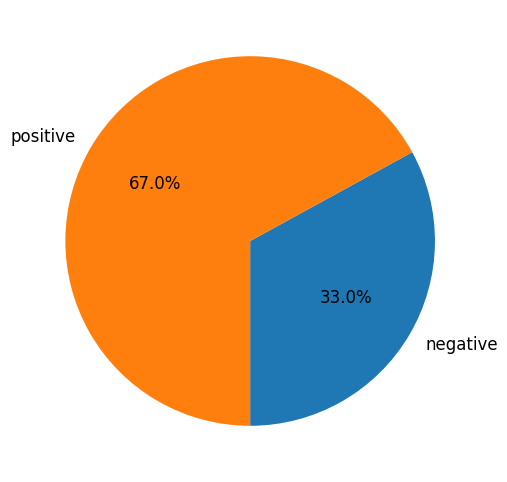

In [10]:
import matplotlib.pyplot as plt
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")


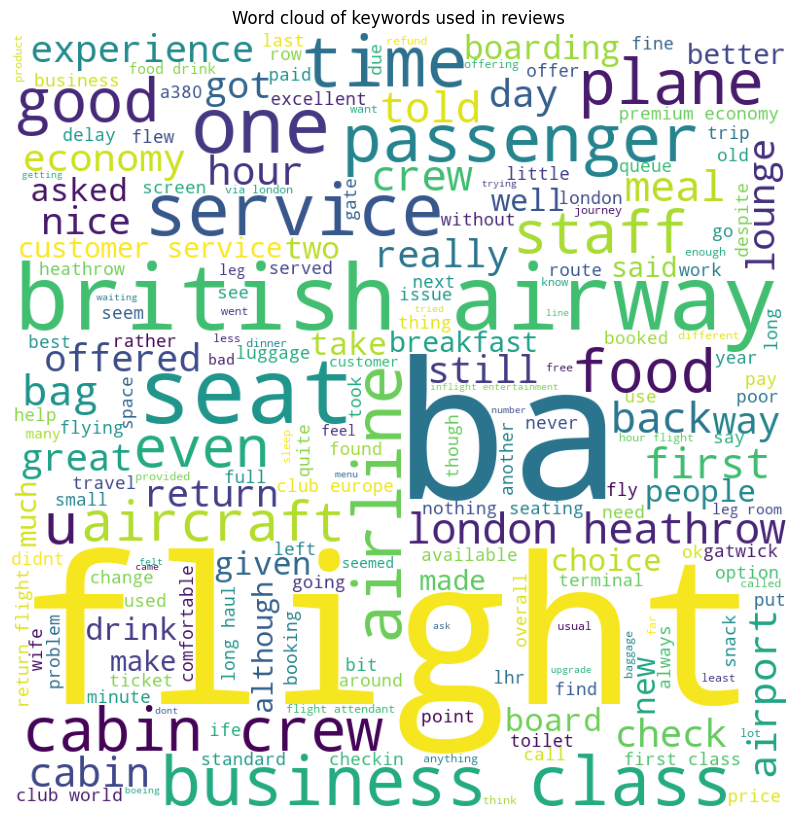

In [19]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''

for val in df["tokenize"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Word cloud of keywords used in reviews")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

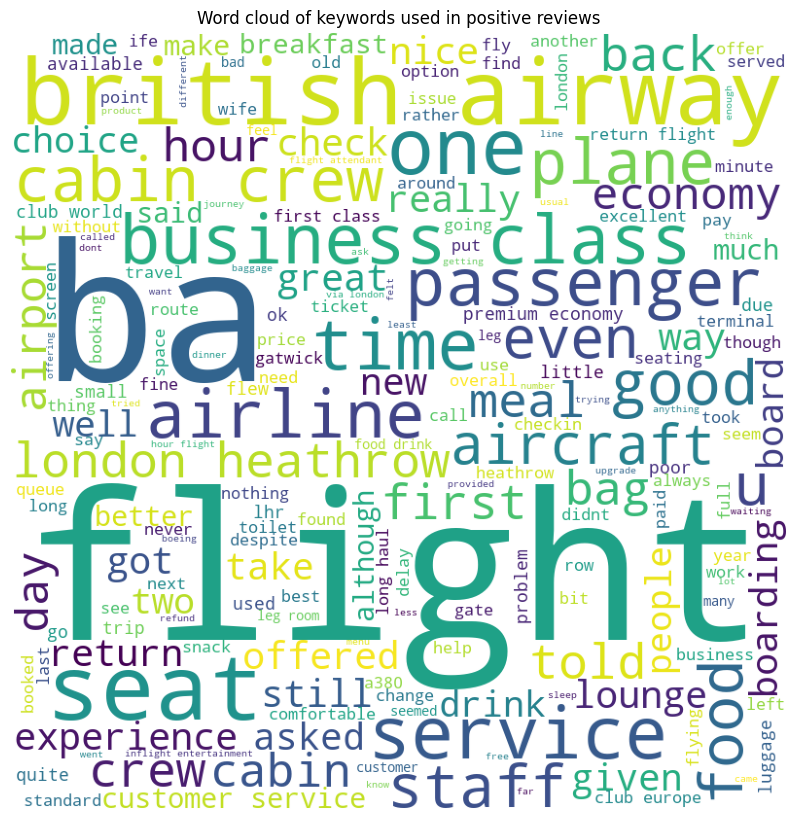

In [20]:
comment_words = ''

df["pos-reviews"] = df[df["sentiment"] == "positive"]["tokenize"]

for val in df["tokenize"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("Word cloud of keywords used in positive reviews")
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

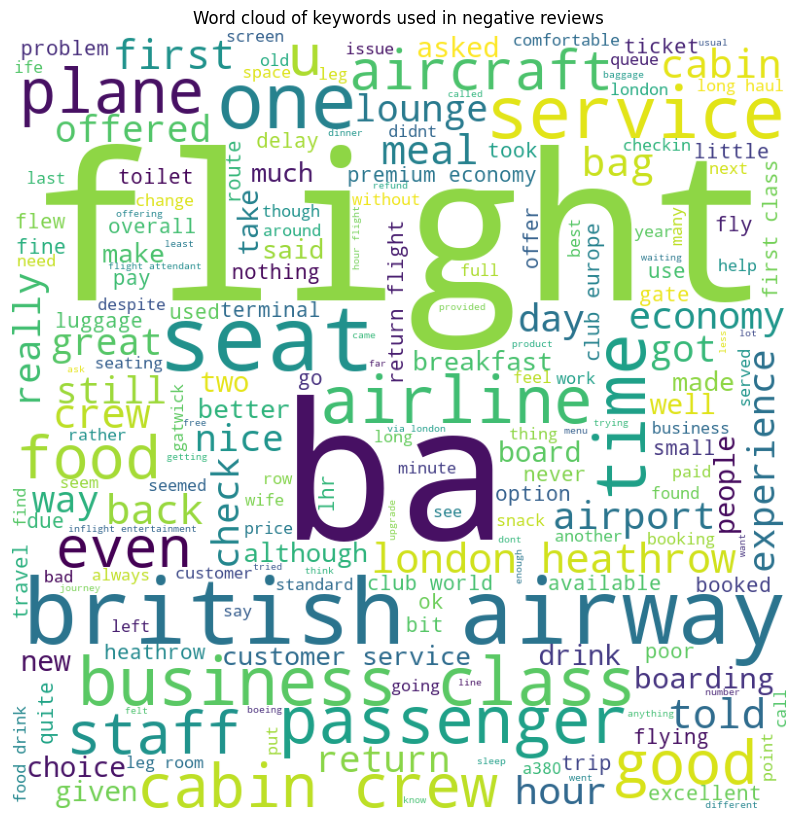

In [21]:
comment_words = ''

df["neg-reviews"] = df[df["sentiment"] == "negative"]["tokenize"]

for val in df["tokenize"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word cloud of keywords used in negative reviews")
plt.tight_layout(pad = 0)
 
plt.show()